In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

import project_functions as pf

In [2]:
df = pd.read_csv(r'data/all_songs_data.csv')

In [3]:
df

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year
0,Battle of New Orleans,https://genius.com/albums/Johnny-horton/Battle...,Johnny Horton,[],[Verse 1] In 1814 we took a little trip Along ...,[{'native_uri': 'spotify:track:0dwpdcQkeZqpuoA...,1,1959-04-01,The Battle Of New Orleans,https://genius.com/Johnny-horton-the-battle-of...,"[{'api_path': '/artists/561913', 'header_image...",1959.0
1,That’s All,https://genius.com/albums/Bobby-darin/That-s-all,Bobby Darin,[],"Oh the shark, babe Has such teeth, dear And he...",[{'native_uri': 'spotify:track:3E5ndyOfO6vFDEI...,2,NaN,Mack The Knife,https://genius.com/Bobby-darin-mack-the-knife-...,"[{'api_path': '/artists/218851', 'header_image...",1959.0
2,“Mr Personality’s” 15 Big Hits,https://genius.com/albums/Lloyd-price/Mr-perso...,Lloyd Price,[],Over and over I tried to prove my love to you ...,"[{'provider': 'youtube', 'start': 0, 'type': '...",3,NaN,Personality,https://genius.com/Lloyd-price-personality-lyrics,"[{'api_path': '/artists/355804', 'header_image...",1959.0
3,The Greatest Hits Of Frankie Avalon,https://genius.com/albums/Frankie-avalon/The-g...,Frankie Avalon,[],"Hey, Venus! Oh, Venus! Venus, if you will Ple...",[],4,NaN,Venus,https://genius.com/Frankie-avalon-venus-lyrics,"[{'api_path': '/artists/1113175', 'header_imag...",1959.0
4,Paul Anka Sings His Big 15,https://genius.com/albums/Paul-anka/Paul-anka-...,Paul Anka,[],I'm just a lonely boy Lonely and blue I'm all ...,[],5,NaN,Lonely Boy,https://genius.com/Paul-anka-lonely-boy-lyrics,[],1959.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,BZRP Music Sessions,https://genius.com/albums/Bizarrap/Bzrp-music-...,Bizarrap and Shakira,[],"[Intro: Shakira] (Pa' tipos como tú, uh-uh-uh-...","[{'provider': 'youtube', 'start': 0, 'type': '...",96,2023-01-11,"Bzrp Music Sessions, Vol. 53",https://genius.com/Bizarrap-and-shakira-shakir...,"[{'api_path': '/artists/1405', 'header_image_u...",2023.0
6496,Travis Scott - UTOPIA (Русский перевод),https://genius.com/albums/Genius-russian-trans...,Travis Scott featuring Drake,[],[Часть I] [Интро: Drake] Е Напряжение точно р...,"[{'provider': 'youtube', 'start': 0, 'type': '...",97,2023-07-28,Meltdown,https://genius.com/Genius-russian-translations...,[],2023.0
6497,L3*,https://genius.com/albums/Latto/L3,Latto featuring Cardi B,"[{'api_path': '/artists/621678', 'header_image...",(Go Grizz) Ah (Squat made the beat) What's hap...,"[{'provider': 'youtube', 'start': 0, 'type': '...",98,2023-06-02,Put It on da Floor Again,https://genius.com/Latto-put-it-on-da-floor-ag...,"[{'api_path': '/artists/163578', 'header_image...",2023.0
6498,Born This Way,https://genius.com/albums/Lady-gaga/Born-this-way,Lady Gaga,[],Money [Verse 1] Love is just a history that t...,[{'native_uri': 'spotify:track:11BKm0j4eYoCPPp...,99,2011-05-23,Bloody Mary,https://genius.com/Lady-gaga-bloody-mary-lyrics,"[{'api_path': '/artists/65581', 'header_image_...",2023.0


# Process dataset

In [4]:
df2 = df.copy()

yearly_word_dict_titles = pf.title_word_dictionary(df2, 20)
selected_words = pf.filter_words_by_years(yearly_word_dict_titles, min_years = 10)


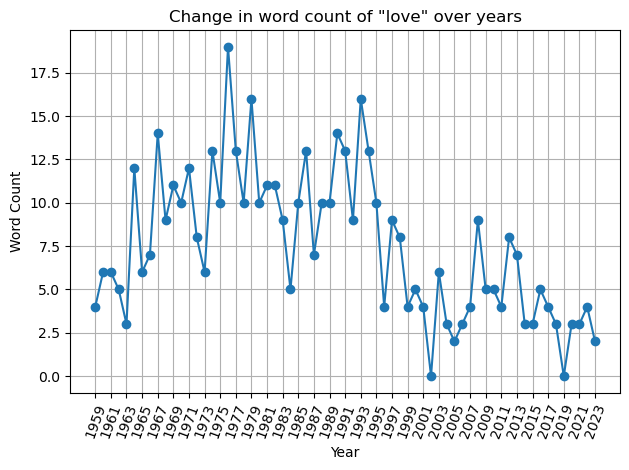

In [44]:
# Word to track over the years
word_to_track = 'love'

# Extract years and corresponding counts for the word 'love'
years = list(yearly_word_dict_titles.keys())
counts = [yearly_word_dict_titles[year].get(word_to_track, 0) for year in years]

# Create line plot
plt.plot(years, counts, marker='o', linestyle='-')
plt.title(f'Change in word count of "{word_to_track}" over years')
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.grid(True)

# Add minor ticks for better spacing between years
plt.xticks(np.arange(years[0], years[-1] + 1, 2), rotation=70)

plt.tight_layout()
plt.show()


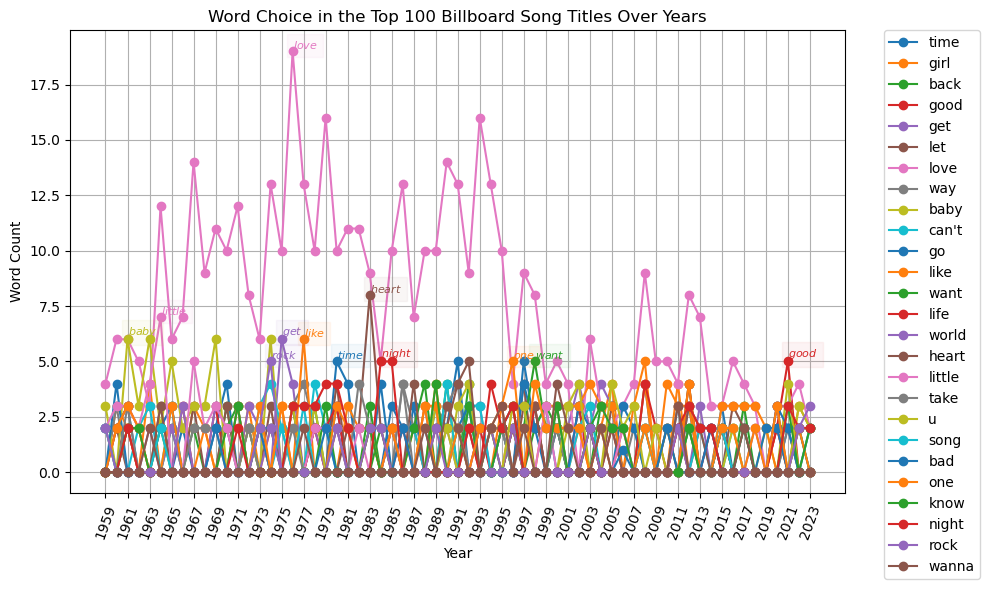

In [72]:
yearly_word_dict_titles = title_word_dictionary(df2, 20)
selected_words = filter_words_by_years(yearly_word_dict_titles, min_years = 10)

# List to store names of words with counts exceeding 5 in any year
annotated_words = []

# Create line plots for all words
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Get default color cycle
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i, word_to_track in enumerate(selected_words):
    # Extract years and corresponding counts for the word
    years = list(yearly_word_dict_titles.keys())
    counts = [yearly_word_dict_titles[year].get(word_to_track, 0) for year in years]

    # Plot the change in word count over years
    plt.plot(years, counts, marker='o', label=word_to_track, color=colors[i % len(colors)])

    # Find the index of the maximum count
    max_count_index = counts.index(max(counts))

    # Add the word to annotated_words if the maximum count exceeds:
    label_max_word_count = 5
    if counts[max_count_index] >= label_max_word_count:
        annotated_words.append((word_to_track, years[max_count_index], counts[max_count_index]))

plt.title('Word Choice in the Top 100 Billboard Song Titles Over Years')
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.grid(True)

# Add minor ticks for better spacing between years
plt.xticks(np.arange(years[0], years[-1] + 1, 2), rotation=70)

# Add legend outside the right border
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add annotations for words
for word_to_annotate, year, count in annotated_words:
    # Get the corresponding line color
    line_color = colors[selected_words.index(word_to_annotate) % len(colors)]
    plt.text(year, count, f'$\\bf{{\\it {word_to_annotate}}}$', fontsize=8, verticalalignment='bottom',
             color=line_color, bbox=dict(facecolor=line_color, alpha=0.05, edgecolor=line_color))

plt.tight_layout()
plt.show()


## See animation.gif for preview

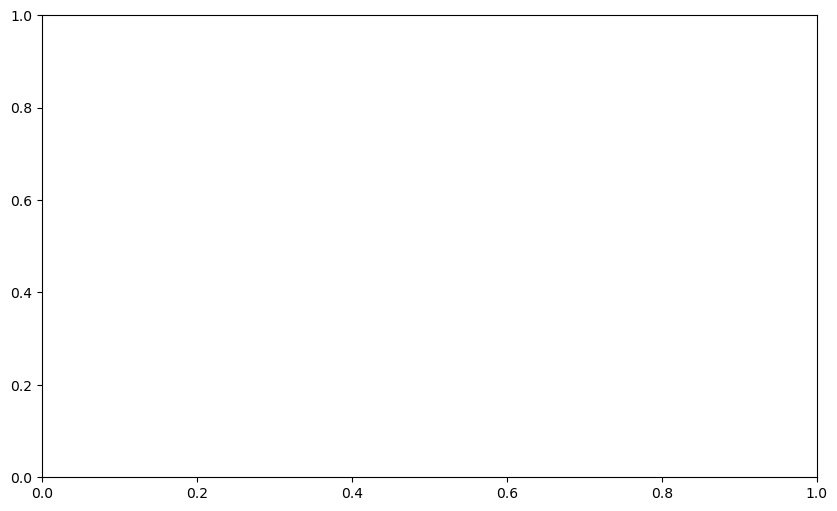

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

def update(frame):
    plt.cla()

    for i, word_to_track in enumerate(selected_words):
        years = list(yearly_word_dict_titles.keys())
        counts = [yearly_word_dict_titles[year].get(word_to_track, 0) for year in years]

        plt.plot(years[:frame+1], counts[:frame+1], marker='o', label=word_to_track, color=colors[i % len(colors)])

        max_count_index = counts.index(max(counts[:frame+1]))

        label_max_word_count = 5
        if counts[max_count_index] >= label_max_word_count:
            annotated_words.append((word_to_track, years[max_count_index], counts[max_count_index]))

    plt.title('Word Choice in the Top 100 Billboard Song Titles Over Years')
    plt.xlabel('Year')
    plt.ylabel('Word Count')
    plt.grid(True)

    plt.xticks(np.arange(years[0], years[-1] + 1, 2), rotation=70)

    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    for word_to_annotate, year, count in annotated_words:
        line_color = colors[selected_words.index(word_to_annotate) % len(colors)]
        plt.text(year, count, f'$\\bf{{\\it {word_to_annotate}}}$', fontsize=8, verticalalignment='bottom',
                 color=line_color, bbox=dict(facecolor=line_color, alpha=0.05, edgecolor=line_color))

    plt.tight_layout()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the initial plot
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
annotated_words = []

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=False)

plt.show()
